In [1]:
!pip install pyod


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190250 sha256=d5972926dec44a98f655bab9fc81ef8184f85560d9abbd8491b34e1f3de0111d
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


Identified outliers:
       sofifa_id                                         player_url  \
77        212190  https://sofifa.com/player/212190/niklas-sule/2...   
165       213331  https://sofifa.com/player/213331/jonathan-tah/...   
280       203263  https://sofifa.com/player/203263/harry-maguire...   
518       179783  https://sofifa.com/player/179783/ralf-fahrmann...   
642       202750  https://sofifa.com/player/202750/willy-boly/20...   
851       202849  https://sofifa.com/player/202849/jannik-vester...   
1147      164376  https://sofifa.com/player/164376/graziano-pell...   
1217      200212  https://sofifa.com/player/200212/michael-esser...   
1389      199833  https://sofifa.com/player/199833/lars-unnersta...   
1834      220932  https://sofifa.com/player/220932/lovre-kalinic...   
1888      136113  https://sofifa.com/player/136113/wes-morgan/20...   
2278      194904  https://sofifa.com/player/194904/bill-hamid/20...   
2947      216793  https://sofifa.com/player/216793/jean-

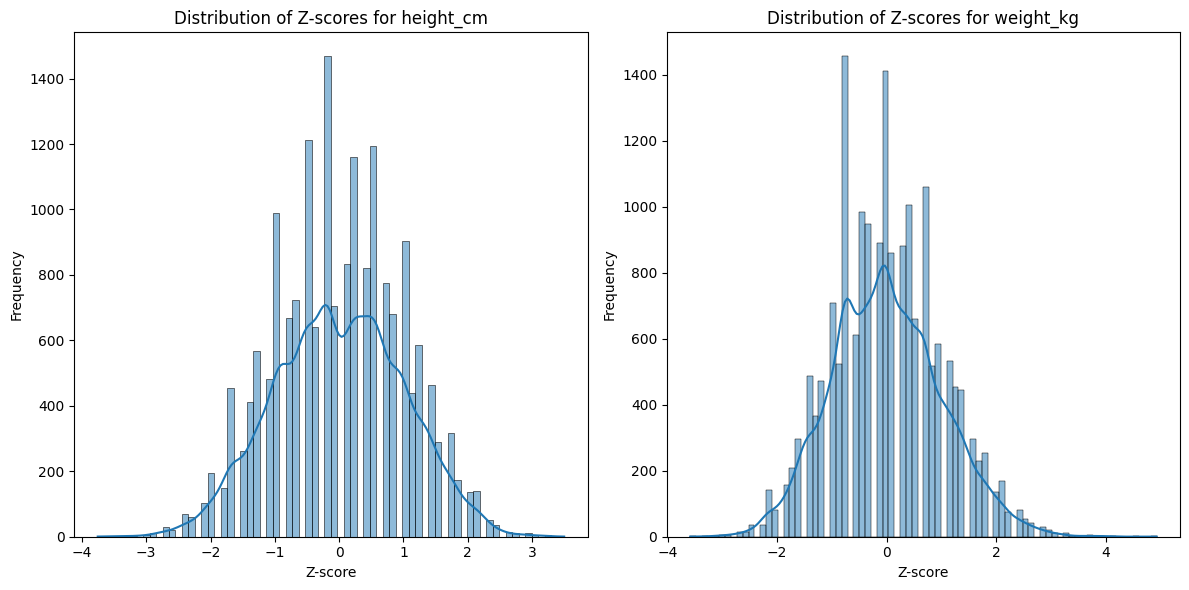

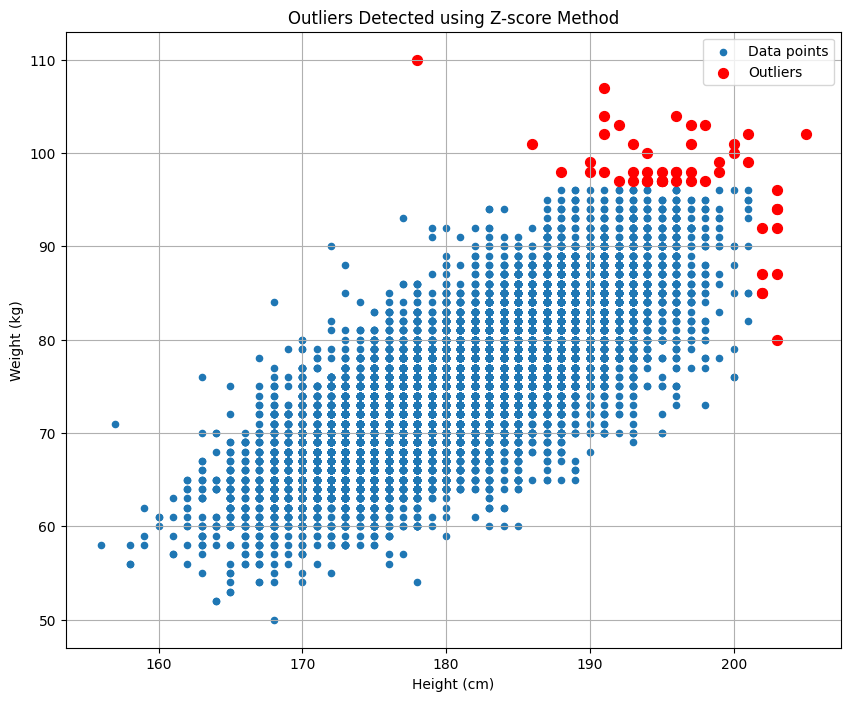

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the FIFA 20 Players dataset
df = pd.read_csv('/content/drive/MyDrive/players_20.csv')

# Selecting numeric columns for outlier detection
numeric_columns = ['height_cm', 'weight_kg']  # Choose the columns you want to analyze for outliers
df_numeric = df[numeric_columns]

# Calculate z-scores for each data point
z_scores = (df_numeric - df_numeric.mean()) / df_numeric.std()

# Define a threshold for outlier detection
threshold = 3  # Adjust as needed, typically 3 or more standard deviations from the mean

# Identify outliers
outliers = df[(z_scores > threshold).any(axis=1)]

# Display identified outliers
print("Identified outliers:")
print(outliers)

# Visualize z-scores distribution
plt.figure(figsize=(12, 6))
for i, col in enumerate(df_numeric.columns, 1):
    plt.subplot(1, 2, i)
    sns.histplot(z_scores[col], kde=True)
    plt.title(f'Distribution of Z-scores for {col}')
    plt.xlabel('Z-score')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Plot the data points along with the outliers
plt.figure(figsize=(10, 8))
plt.scatter(df_numeric['height_cm'], df_numeric['weight_kg'], s=20, label='Data points')
plt.scatter(outliers['height_cm'], outliers['weight_kg'], color='red', s=50, label='Outliers')
plt.title('Outliers Detected using Z-score Method')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.legend()
plt.grid(True)
plt.show()
